In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import glob
from sklearn import linear_model

In [2]:
"""
# raw files
paths = ["DataForValidatingModels/Eugene/", "DataForValidatingModels/Cocoa/", "DataForValidatingModels/Golden/"]
files = sum([glob.glob(path + "*.csv") for path in paths], [])

#loop over them and create df for each csv
for file in files:
    with open(file, "r") as f:
        f.readline() # skip line
        f.readline() # skip line
        lines = f.readlines()

    with open("cleaned/" + file, "w") as f:
        header = lines[0].split(",")
        f.write(",".join(header) + "\n") # write header
        for line in lines[1:]:
            f.write(",".join(line.split(",")[:len(header)]) + "\n") # write only labeled columns
cleaned_files = ["cleaned/" + file for file in files]
"""

'\n# raw files\npaths = ["DataForValidatingModels/Eugene/", "DataForValidatingModels/Cocoa/", "DataForValidatingModels/Golden/"]\nfiles = sum([glob.glob(path + "*.csv") for path in paths], [])\n\n#loop over them and create df for each csv\nfor file in files:\n    with open(file, "r") as f:\n        f.readline() # skip line\n        f.readline() # skip line\n        lines = f.readlines()\n\n    with open("cleaned/" + file, "w") as f:\n        header = lines[0].split(",")\n        f.write(",".join(header) + "\n") # write header\n        for line in lines[1:]:\n            f.write(",".join(line.split(",")[:len(header)]) + "\n") # write only labeled columns\ncleaned_files = ["cleaned/" + file for file in files]\n'

In [3]:
"""
# create master csv
counts, dfs = {"Cocoa": 0, "Eugene": 0, "Golden": 0}, []
for file in cleaned_files:
    df = pd.read_csv(file)
    df["Time Stamp"] = df["Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss"].apply(lambda x : x.split("T")[0])
    df_filtered = df.groupby(["Time Stamp"], as_index=False).first()
    site = file.split("/")[2]
    df_filtered["Site"], df_filtered["Site Index"] = site, counts[site]
    if(file == "cleaned/DataForValidatingModels/Cocoa/Cocoa_mSi0166.csv"):
        df_filtered["Cleaned"] = 1
    if(file == "cleaned/DataForValidatingModels/Eugene/Eugene_mSi0166.csv"):
        df_filtered["Cleaned"] = 1
    if(file == "cleaned/DataForValidatingModels/Golden/Golden_mSi0247.csv"):
        df_filtered["Cleaned"] = 1
    else:
        df_filtered["Cleaned"] = 0
    counts[site] += 1
    dfs.append(df_filtered)
df = pd.concat(dfs)
df.to_csv("solar-panels.csv")
"""

'\n# create master csv\ncounts, dfs = {"Cocoa": 0, "Eugene": 0, "Golden": 0}, []\nfor file in cleaned_files:\n    df = pd.read_csv(file)\n    df["Time Stamp"] = df["Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss"].apply(lambda x : x.split("T")[0])\n    df_filtered = df.groupby(["Time Stamp"], as_index=False).first()\n    site = file.split("/")[2]\n    df_filtered["Site"], df_filtered["Site Index"] = site, counts[site]\n    if(file == "cleaned/DataForValidatingModels/Cocoa/Cocoa_mSi0166.csv"):\n        df_filtered["Cleaned"] = 1\n    if(file == "cleaned/DataForValidatingModels/Eugene/Eugene_mSi0166.csv"):\n        df_filtered["Cleaned"] = 1\n    if(file == "cleaned/DataForValidatingModels/Golden/Golden_mSi0247.csv"):\n        df_filtered["Cleaned"] = 1\n    else:\n        df_filtered["Cleaned"] = 0\n    counts[site] += 1\n    dfs.append(df_filtered)\ndf = pd.concat(dfs)\ndf.to_csv("solar-panels.csv")\n'

In [4]:
# read data
df = pd.read_csv("solar-panels.csv")
df.head()

,Unnamed: 0,Time Stamp,Time Stamp (local standard time) yyyy-mm-ddThh:mm:ss,POA irradiance CMP22 pyranometer (W/m2),POA irradiance uncertainty (%),PV module back surface temperature (degC),PV module back surface temperature uncertainty (degC),Isc (A),Isc uncertainty (%),Pmp (W),...,Diffuse horizontal irradiance standard deviation of 1-second samples of 5-second average (W/m2),Solar QA residual (W/m2) = Direct*cos(zenith) + Diffuse Horiz. Global Horiz,PV module soiling derate,Daily maintenance start time (hour: minute) - no maintenance that day = 99:99,Daily maintenance end time (hour: minute) - no maintenance that day = 99:99,Precipitation prior to daily maintenance (mm) accumulated daily total,Number of I-V curve data pairs (n),Site,Site Index,Cleaned
0,0,2012-12-20,2012-12-20T10:40:12,22.7,15.6,5.2,1.9,0.1371,1.1,4.8606,...,0.0,0.3,1.0,15:52,15:56,24.0,185,Eugene,0,0
1,1,2012-12-21,2012-12-21T09:00:12,22.4,15.9,6.8,1.9,0.1353,1.0,4.7491,...,0.0,0.2,1.0,08:36,08:42,1.0,185,Eugene,0,0
2,2,2012-12-22,2012-12-22T08:15:12,59.1,7.2,6.1,1.9,0.3532,0.5,13.4801,...,0.0,-0.5,1.0,99:99,99:99,-9999.0,185,Eugene,0,0
3,3,2012-12-23,2012-12-23T11:25:12,20.5,17.3,6.3,1.9,0.1231,1.1,4.3016,...,0.0,0.4,1.0,99:99,99:99,-9999.0,184,Eugene,0,0
4,4,2012-12-24,2012-12-24T08:30:13,21.3,16.7,6.1,1.9,0.1165,1.2,4.0609,...,0.0,0.0,1.0,08:04,08:13,1.4,184,Eugene,0,0


In [17]:
df_weather = pd.read_csv("weather-data.csv")
df_weather.head()

,Unnamed: 0,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,0,2011-01-21,20,17,0.0,5.2,4,84,09:11 PM,09:21 AM,...,21,70,91,6.0,1010,20,10,176,14,32922
1,1,2011-01-22,16,9,0.0,10.4,4,77,10:17 PM,10:00 AM,...,28,38,75,0.2,1011,16,10,299,21,32922
2,2,2011-01-23,15,6,0.0,10.4,4,69,11:23 PM,10:37 AM,...,21,8,67,0.0,1020,15,10,221,14,32922
3,3,2011-01-24,20,13,0.0,8.4,4,62,No moonrise,11:16 AM,...,22,44,74,0.6,1022,20,10,99,14,32922
4,4,2011-01-25,23,18,0.0,5.2,5,55,12:27 AM,11:55 AM,...,38,71,83,3.4,1016,23,10,158,23,32922


In [5]:
# filter data
df2 = df[df["Relative humidity (%RH)"] != -9999]
df3 = df2[df2["POA irradiance CMP22 pyranometer (W/m2)"] < 400]

Text(0.5, 1.0, 'Soiling Degradation vs Humidity')

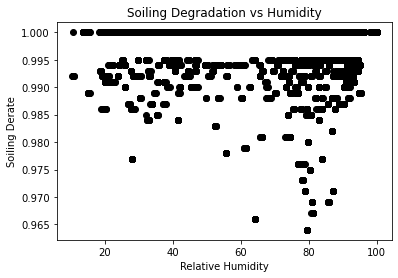

In [6]:
plt.scatter(df3["Relative humidity (%RH)"], df3["PV module soiling derate"], color="black") 
plt.xlabel("Relative Humidity"); plt.ylabel("Soiling Derate")
plt.title("Soiling Degradation vs Humidity")

Text(0.5, 1.0, 'Back Temperature Effect on Soiling Degradation')

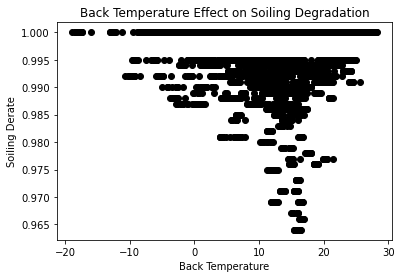

In [7]:
plt.scatter(df3["PV module back surface temperature (degC)"], df3["PV module soiling derate"], color="black") 
plt.xlabel("Back Temperature"); plt.ylabel("Soiling Derate")
plt.title("Back Temperature Effect on Soiling Degradation")

Text(0.5, 1.0, 'Soiling Degradation vs POA Irradiance')

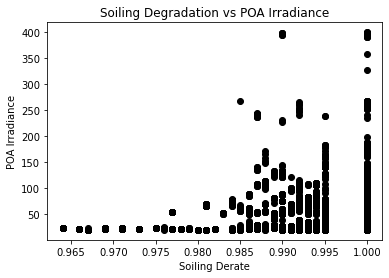

In [8]:
plt.scatter(df3["PV module soiling derate"], df3["POA irradiance CMP22 pyranometer (W/m2)"], color="black") 
plt.xlabel("Soiling Derate"); plt.ylabel("POA Irradiance")
plt.title("Soiling Degradation vs POA Irradiance")

count    11286.000000
mean      -901.523755
std       2980.774222
min      -9999.000000
25%         51.100000
50%         82.000000
75%         89.700000
max        100.000000
Name: Relative humidity (%RH), dtype: float64
count    10188.000000
mean        74.999058
std         21.237882
min         10.300000
25%         68.875000
50%         83.800000
75%         90.200000
max        100.000000
Name: Relative humidity (%RH), dtype: float64


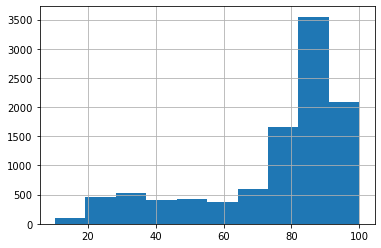

In [9]:
print(df["Relative humidity (%RH)"].describe())
print(df3["Relative humidity (%RH)"].describe())
df3["Relative humidity (%RH)"].hist()

count    11286.000000
mean        12.598627
std          7.848526
min        -18.900000
25%          7.100000
50%         13.000000
75%         18.500000
max         47.700000
Name: PV module back surface temperature (degC), dtype: float64
count    10188.000000
mean        12.600481
std          7.817854
min        -18.900000
25%          7.000000
50%         12.800000
75%         18.600000
max         28.200000
Name: PV module back surface temperature (degC), dtype: float64


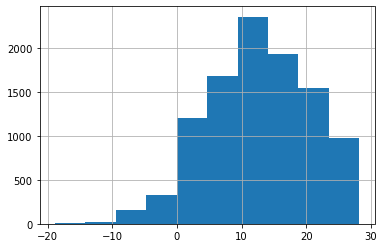

In [10]:
print(df["PV module back surface temperature (degC)"].describe())
print(df3["PV module back surface temperature (degC)"].describe())
df3["PV module back surface temperature (degC)"].hist()

count    11286.000000
mean         0.997620
std          0.004866
min          0.964000
25%          0.995000
50%          1.000000
75%          1.000000
max          1.000000
Name: PV module soiling derate, dtype: float64
count    10188.000000
mean         0.997753
std          0.004877
min          0.964000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: PV module soiling derate, dtype: float64


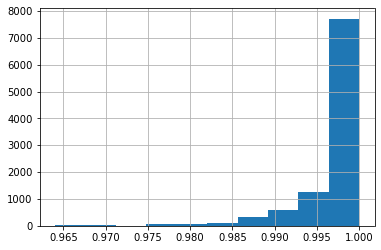

In [11]:
print(df["PV module soiling derate"].describe())
print(df3["PV module soiling derate"].describe())
df3["PV module soiling derate"].hist()

count    11286.000000
mean        44.487852
std         39.186134
min         20.000000
25%         22.800000
50%         27.200000
75%         57.600000
max       1100.600000
Name: POA irradiance CMP22 pyranometer (W/m2), dtype: float64
count    10188.000000
mean        41.554250
std         36.304042
min         20.000000
25%         22.500000
50%         25.900000
75%         53.500000
max        399.700000
Name: POA irradiance CMP22 pyranometer (W/m2), dtype: float64


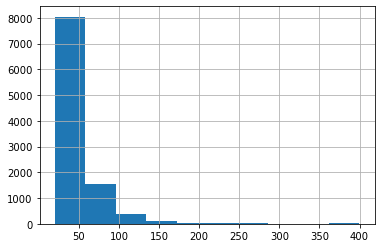

In [12]:
print(df["POA irradiance CMP22 pyranometer (W/m2)"].describe())
print(df3["POA irradiance CMP22 pyranometer (W/m2)"].describe())
df3["POA irradiance CMP22 pyranometer (W/m2)"].hist()

In [13]:
# create basic regression model
x_vars = ["Relative humidity (%RH)", "PV module back surface temperature (degC)"]
y_var = ["PV module soiling derate"]
simple_reg = sklearn.linear_model.LinearRegression(normalize=True)
simple_reg.fit(df3.loc[:, x_vars], df3.loc[:, y_var])

# predictions
pred = simple_reg.predict(df3.loc[:, x_vars])
print("mean squared error", sklearn.metrics.mean_squared_error(pred, df3.loc[:, y_var]))
print("coefficients", simple_reg.coef_)

mean squared error 2.3375938699608887e-05
coefficients [[ 3.04336785e-05 -2.23806953e-05]]


In [14]:
df_cleaned = df3[df3["Cleaned"] == 1]
df_dirty = df3[df3["Cleaned"] == 0]

In [15]:
# create basic regression model
simple_reg = sklearn.linear_model.LinearRegression(normalize=True)
simple_reg.fit(df_dirty.loc[:, x_vars], df_dirty.loc[:, y_var])

# predictions
pred = simple_reg.predict(df_dirty.loc[:, x_vars])
print("mean squared error", sklearn.metrics.mean_squared_error(pred, df_dirty.loc[:, y_var]))
print("coefficients", simple_reg.coef_)

mean squared error 2.3687567835300785e-05
coefficients [[ 3.63955681e-05 -2.21484936e-05]]


In [16]:
# create basic regression model
simple_reg = sklearn.linear_model.LinearRegression(normalize=True)
simple_reg.fit(df_cleaned.loc[:, x_vars], df_cleaned.loc[:, y_var])

# predictions
pred = simple_reg.predict(df_cleaned.loc[:, x_vars])
print("mean squared error", sklearn.metrics.mean_squared_error(pred, df_cleaned.loc[:, y_var]))
print("coefficients", simple_reg.coef_)

mean squared error 0.0
coefficients [[0. 0.]]
